In [2]:
from numpy import *
import matplotlib.pyplot as plt
#%matplotlib widget
from random import randint

In [3]:

set_printoptions(precision=5,floatmode="maxprec",suppress=False)

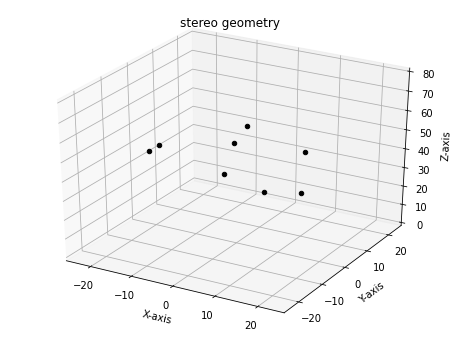

In [5]:
#p1 = array([[-19, 0, 23],
 #           [21, 3, 24],
  #          [3, 15, 25],
   #         [-11, 9, 47],
    #        [12, 10, 53],
     #       [0, -8, 49],
      #      [-1, 1, 60],
       #     [-7, 7, 66]])
p1 = array(zeros((8, 3)), ndmin=2)
for i in range(len(p1)):
    p1[i, 0] = randint(-20, 20)
    p1[i, 1] = randint(-20, 20)
    p1[i, 2] = randint(20, 70)
    
# define axis and figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111,projection='3d')

# set limits
ax.set(xlim=(-25, 25), ylim=(-25, 25), zlim=(0, 80))

# plot the world point
for i in range(len(p1)):
    ax.scatter(*p1[i], color="black")

ax.set_title("stereo geometry")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

#plt.legend()
plt.show()

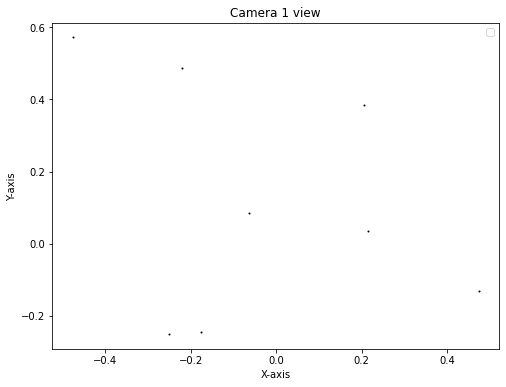

In [6]:
p1_ = array(zeros((8, 3)), ndmin=2)
for i in range (len(p1)):
    p1_[i, 0] = p1[i, 0] / p1[i][2]
    p1_[i, 1] = p1[i, 1] / p1[i][2]
    p1_[i, 2] = 1

fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111)
for i in range(len(p1_)):
    ax.scatter(*p1_[i], color="black")

ax.set_title("Camera 1 view")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

plt.legend()

In [8]:
phi = pi/6
Ry = array([[cos(phi),  0, sin(phi)],
            [0,         1, 0],
            [-sin(phi), 0, cos(phi)]] )
T = array([10, 0, 0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


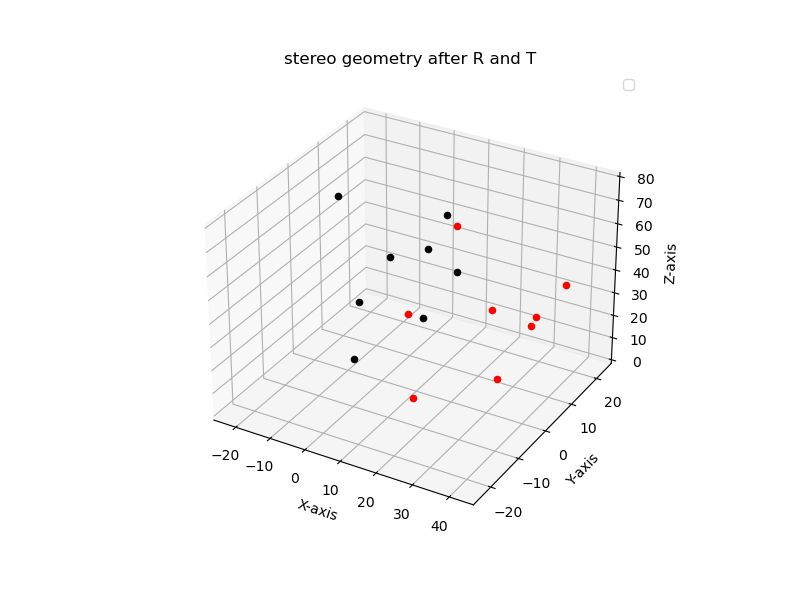

In [ ]:
p2 = array(zeros((8, 3)), ndmin=2)
for i in range(len(p2)):
    p2[i] = dot(Ry, p1[i]) + T
    
# define axis and figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111,projection='3d')

# set limits
#ax.set(xlim=(0, 45), ylim=(-15, 25), zlim=(0, 70))
ax.set(xlim=(-25, 45), ylim=(-25, 25), zlim=(0, 80))

# plot the world point
for i in range(len(p1)):
    ax.scatter(*p1[i], color="black")
    ax.scatter(*p2[i], color="red")

ax.set_title("stereo geometry after R and T")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


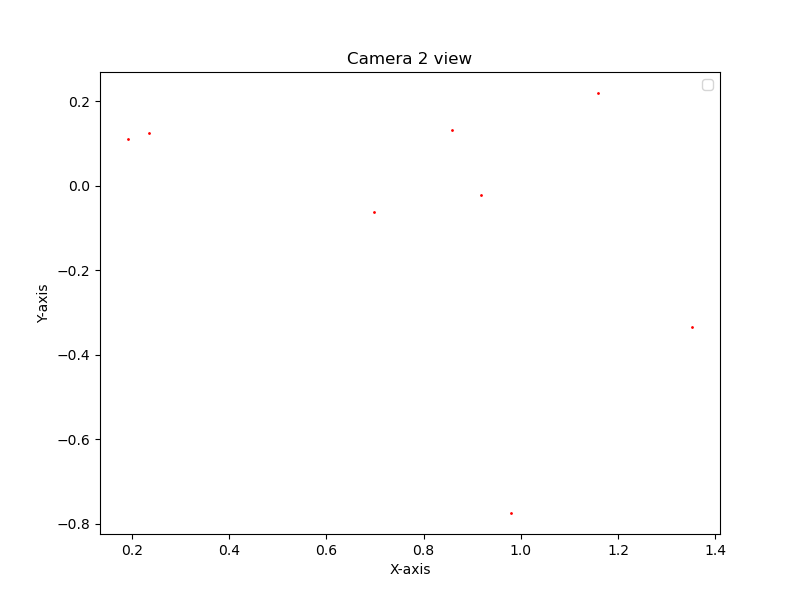

In [ ]:
p2_ = array(zeros((8, 3)), ndmin=2)
for i in range (len(p2)):
    p2_[i, 0] = p2[i, 0] / p2[i][2]
    p2_[i, 1] = p2[i, 1] / p2[i][2]
    p2_[i, 2] = 1

fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111)
for i in range(len(p2_)):
    ax.scatter(*p2_[i], color="red")
    #ax.scatter(*p1_[i], color="black")

ax.set_title("Camera 2 view")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

plt.legend()

In [ ]:
X = array(zeros((8, 9)), ndmin=2)
for i in range (len(p1_)):
    X[i] = kron(p1_[i], p2_[i])
print(X.shape)
# X = X.T
X

(8, 9)


array([[ 6.01994e-02, -5.41847e-03,  8.62069e-02, -3.61197e-02,
         3.25108e-03, -5.17241e-02,  6.98313e-01, -6.28542e-02,
         1.00000e+00],
       [ 2.51996e-01, -1.99251e-01,  2.57143e-01, -5.59990e-01,
         4.42781e-01, -5.71429e-01,  9.79983e-01, -7.74867e-01,
         1.00000e+00],
       [-7.08331e-02, -3.76633e-02, -3.01587e-01,  2.98244e-02,
         1.58582e-02,  1.26984e-01,  2.34867e-01,  1.24884e-01,
         1.00000e+00],
       [ 4.02662e-01,  7.64761e-02,  3.47826e-01,  1.76165e-01,
         3.34583e-02,  1.52174e-01,  1.15765e+00,  2.19869e-01,
         1.00000e+00],
       [ 2.03835e-01, -4.67250e-03,  2.22222e-01, -1.45596e-02,
         3.33750e-04, -1.58730e-02,  9.17257e-01, -2.10262e-02,
         1.00000e+00],
       [-6.66995e-02, -3.84378e-02, -3.46154e-01,  2.22332e-02,
         1.28126e-02,  1.15385e-01,  1.92687e-01,  1.11043e-01,
         1.00000e+00],
       [ 5.87544e-01, -1.45718e-01,  4.34783e-01, -2.93772e-01,
         7.28592e-02, -2.17391

In [ ]:
ux, sx, vhx = linalg.svd(X)
print(ux, sx, vhx, vhx.shape)



[[-0.31514 -0.13814 -0.11093 -0.30462  0.57888  0.42685  0.35793 -0.36206]
 [-0.42105  0.60328 -0.51635 -0.30866 -0.30908 -0.00841 -0.02557  0.02484]
 [-0.20962 -0.44432 -0.39406  0.19582 -0.12759 -0.26988 -0.37138 -0.58135]
 [-0.40372 -0.19538  0.52398 -0.14039 -0.58532  0.37771 -0.02914 -0.13582]
 [-0.3615  -0.09048  0.11615 -0.17227  0.38462  0.03214 -0.70539  0.41403]
 [-0.20175 -0.44926 -0.43999  0.30134 -0.15262  0.25882  0.27023  0.55657]
 [-0.47811  0.34298  0.2275   0.73177  0.19655 -0.09032  0.119   -0.07468]
 [-0.3413  -0.23175  0.18001 -0.3129   0.02503 -0.72529  0.38431  0.15848]] [3.81073e+00 1.39830e+00 1.01074e+00 2.33987e-01 1.65782e-01 3.99102e-02
 1.07092e-16 5.98536e-17] [[-1.75606e-01  3.49761e-02 -1.29981e-01  7.38121e-02 -6.46549e-02
   5.78941e-02 -6.45314e-01  8.70438e-02 -7.16978e-01]
 [ 1.94546e-01 -1.11344e-01  3.21913e-01 -3.64834e-01  1.92523e-01
  -4.09225e-01  1.85229e-01 -5.36816e-01 -4.31290e-01]
 [ 3.14552e-01  1.44522e-01  4.64708e-01  3.07791e-01 -2

In [ ]:
vhx = vhx.T
Es = vhx[:, 8]
E = Es.reshape(3, 3)
E

array([[-1.89113e-01, -5.88509e-01, -3.27553e-01],
       [ 5.61150e-01,  7.26361e-16, -2.05078e-01],
       [ 3.27553e-01, -1.02972e-01, -1.89113e-01]])

In [ ]:
u, s, vh = linalg.svd(E)
print(u, s, vh)

[[-0.27946 -0.94905 -0.14562]
 [ 0.82923 -0.1621  -0.53489]
 [ 0.48403 -0.27023  0.83228]] [7.07107e-01 7.07107e-01 3.31584e-17] [[ 9.57019e-01  1.62098e-01 -2.40495e-01]
 [-1.16051e-15  8.29226e-01  5.58914e-01]
 [ 2.90024e-01 -5.34891e-01  7.93585e-01]]


In [ ]:
Ees = u.dot(diag([1, 1, 0])).dot(vh)
#Ees = -Ees
U, S, Vh = linalg.svd(Ees)
print(U, S, Vh)


[[-0.94905 -0.27946 -0.14562]
 [-0.1621   0.82923 -0.53489]
 [-0.27023  0.48403  0.83228]] [1.00000e+00 1.00000e+00 7.99383e-18] [[ 3.94620e-16  8.29226e-01  5.58914e-01]
 [ 9.57019e-01  1.62098e-01 -2.40495e-01]
 [ 2.90024e-01 -5.34891e-01  7.93585e-01]]


In [ ]:
RtzR = array([[0, -1, 0],
              [1, 0, 0],
              [0, 0, 1]])
RtzT = RtzR.T
RR = dot(U,RtzR).dot(Vh)
TR_ = dot(U, RtzR).dot(diag([1, 1, 0])).dot(U.T)

RT = dot(U,RtzT).dot(Vh)
TT_ = dot(U, RtzT).dot(diag([1, 1, 0])).dot(U.T)

#E_ = dot(T_, R)


print("R=")
print(RR)
print(RT)
print("---------------------")
print("T=")
print(TR_)
print(TT_)

R=
[[ 8.66025e-01  1.24900e-16 -5.00000e-01]
 [ 5.55112e-17  1.00000e+00 -2.22045e-16]
 [ 5.00000e-01 -1.66533e-16  8.66025e-01]]
[[-0.95049  0.15579  0.26887]
 [-0.31026 -0.42778 -0.84896]
 [-0.01724 -0.89036  0.45494]]
---------------------
T=
[[ 0.       0.83228  0.53489]
 [-0.83228  0.      -0.14562]
 [-0.53489  0.14562  0.     ]]
[[ 0.      -0.83228 -0.53489]
 [ 0.83228  0.       0.14562]
 [ 0.53489 -0.14562  0.     ]]


In [ ]:
print(Ry)
print(T)

[[ 0.86603  0.       0.5    ]
 [ 0.       1.       0.     ]
 [-0.5      0.       0.86603]]
[0 0 0]
